In [143]:
import pandas as pd
import numpy as np
import sklearn
headers=['workid','rating','warnings','genre','fandom','ship','mainchar','words','kudos','mymistake','ship1']

fanfics=pd.read_csv("/ffdata.csv",names=headers,sep=';')
fanfics=fanfics.drop(index=0)
fanfics=fanfics.drop('mymistake',axis=1)
fanfics=fanfics.drop('ship1',axis=1)
fanfics=fanfics.dropna()
fanfics.info()
fanfics.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1 to 69
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   workid    58 non-null     float64
 1   rating    58 non-null     object 
 2   warnings  58 non-null     object 
 3   genre     58 non-null     object 
 4   fandom    58 non-null     object 
 5   ship      58 non-null     object 
 6   mainchar  58 non-null     object 
 7   words     58 non-null     float64
 8   kudos     58 non-null     float64
dtypes: float64(3), object(6)
memory usage: 4.5+ KB


,workid,rating,warnings,genre,fandom,ship,mainchar,words,kudos
1,42687.0,General%20Audiences,No%20Archive%20Warnings%20Apply,Gen,The%20Dark%20Is%20Rising,The%20Black%20Rider,Will%20Stanton,666.0,23.0
2,869642.0,Teen%20And%20Up%20Audiences,No%20Archive%20Warnings%20Apply,M*s*M,Glee,klaine%20-%20Relationship,Blaine%20Anderson*s*Kurt%20Hummel,668.0,97.0
3,584703.0,Explicit,No%20Archive%20Warnings%20Apply,M*s*M,Supernatural%20RPF,Jensen%20Ackles*s*Misha%20Collins,Misha%20Collins,2348.0,110.0
4,198626.0,Mature,Choose%20Not%20To%20Use%20Archive%20Warnings,F*s*M,Death%20Note,Mello*s*Halle,Mello%20(Mihael%20Keehl),2169.0,42.0
5,572188.0,Explicit,No%20Archive%20Warnings%20Apply,M*s*M,Bandom,Panic!%20at%20the%20Disco,The%20Young%20Veins,1049.0,61.0


Lets check data about kudos first:

In [130]:
print(fanfics['kudos'].mean())
print(fanfics['kudos'].max())
print(fanfics['kudos'].min())

70.05172413793103
395.0
1.0


Okay, what can have impact on likes? Probably words, rating, warning, genre and fandom.


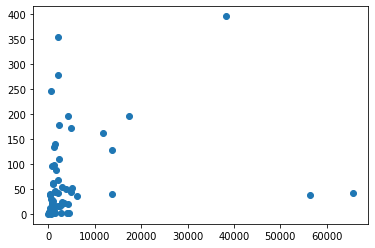

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
target=fanfics['kudos']
words=fanfics['words']
plt.scatter(words, target)



So what do we see.
Words - kudos ranking >> too much words rarely mean more kudos, however most kudos are gain for works with ~3-4k words - not too short and not too long
Then perfect lenght for us is 3-4k words


In [132]:
genres=fanfics['genre']
genres.describe()
popular=fanfics[fanfics['genre']==' M*s*M']
popular.head()
popular['kudos'].mean()
genrelist=genres.unique().tolist()

Most popular genre is M/M with freq=28. Also kudos's mean for M/M fanfics are slightly more than for average fanfiction
Our perfect genre is M/M

In [133]:
ratings=fanfics['rating']
ratings.describe()
r=ratings.unique().tolist()
for i in r:
  popular=fanfics[fanfics['rating']==i]
  print(popular['kudos'].mean(),'genre is',i)
ratingslist=ratings.unique().tolist()

58.76190476190476 genre is  General%20Audiences
44.2 genre is  Teen%20And%20Up%20Audiences
100.4 genre is  Explicit
27.666666666666668 genre is  Mature
166.0 genre is  Not%20Rated


Surprisingly but most popular rating is General with freq=23. Lets see its impact on kudos.

But mean amount of kudos on this one is slightly less than average.
Lets check other ratings

Most kudos are on Explicit rating(18+)

Lets count Not Rated as a data leak

In [134]:
warnings=fanfics['warnings']
r=warnings.unique().tolist()
for i in r:
  popular=fanfics[fanfics['warnings']==i]
  print(popular['kudos'].mean(),'warning is',i)
warningslist=warnings.unique().tolist()

64.92105263157895 warning is  No%20Archive%20Warnings%20Apply
94.6 warning is  Choose%20Not%20To%20Use%20Archive%20Warnings
2.0 warning is  Major%20Character%20Death
43.0 warning is  Graphic%20Depictions%20Of%20Violence
128.0 warning is  Rape*s*Non-Con


Okay, thats quite interesting result
More than average kudos we have with:

>Choose not to use basic warnings - 94.6

>Rape/Non-Con - 128

But that does explain why Explicit rating got more kudos than the rest

In [135]:
fandom=fanfics['fandom']
r=fandom.unique().tolist()
fandom.describe()

count                58
unique               45
top        Supernatural
freq                  4
Name: fandom, dtype: object

Sadly we cant do proper research on fandoms as there are too much unique values and not enough overall values

So, what do we get? By our little research perfect fanfiction:


1.   Words - 3-4k
2.   Genre - M/M
3.   Rating - Explicit
4.   Archive warning - No basic warnings or Rape/Non-con

Time to use machine!


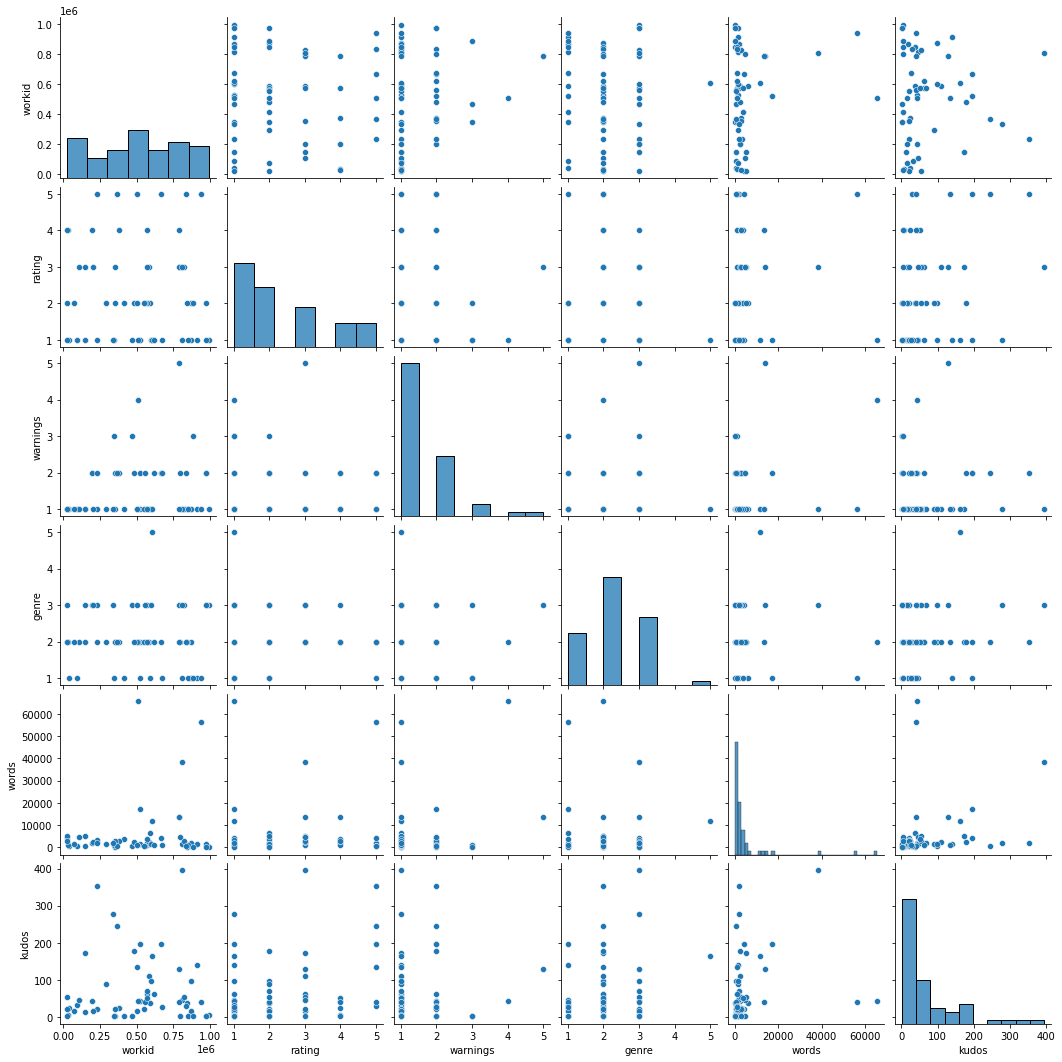

In [146]:
genrelist=[' Gen', ' M*s*M', ' F*s*M', ' Other', ' F*s*F', ' Multi']
possgenre={genrelist[i]:i+1 for i in range(len(genrelist))}
possrating={ratingslist[i]:i+1 for i in range(len(ratingslist))}
posswarning={warningslist[i]:i+1 for i in range(len(warningslist))}
fanfics=fanfics.replace(possgenre)
fanfics=fanfics.replace(possrating)
fanfics=fanfics.replace(posswarning)
fanfics.head()


In [137]:
fanfics.corr

<bound method DataFrame.corr of       workid  rating  warnings  genre  \
1    42687.0       0         0      0   
2   869642.0       1         0      1   
3   584703.0       2         0      1   
4   198626.0       3         1      2   
5   572188.0       2         0      1   
7   350363.0       1         0      1   
9   843714.0       1         0      1   
10  526571.0       0         0      1   
11  589423.0       1         0      0   
12  912821.0       0         0      0   
13  812348.0       0         0      0   
14  467914.0       0         2      2   
15  574265.0       1         0      2   
16  148213.0       0         0      2   
17   23938.0       0         0      2   
18  520546.0       0         1      0   
19  506890.0       0         3      1   
20  293424.0       1         0      1   
21  600761.0       0         0      2   
22  146231.0       2         0      1   
24  606480.0       0         0      4   
25  505938.0       4         0      1   
26  479802.0       1     

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
target=fanfics['kudos'].values
labels=fanfics[['genre','words','rating','warnings']].values

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
   labels, target, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(train_feature_matrix,train_labels)
prediction=model.predict(test_feature_matrix)


[ 1.23741737e+01  2.85731607e-03  2.36996547e+01 -2.01128789e+01]
[ 29.35496793  63.52582383  77.79526026  53.44041801  99.41277567
  58.47623494  22.55060509  28.76064619 121.47434413  81.62320161
 283.17751231 109.38394656]
[ 23.   1.  53.  12.  25. 128.  62.  31.  50.  69.  39.  42.]
[16.77456914]


We got it to work. Somehow...

Im 100% that its like 50% wrong but:
1. at least 25% of that is bad data
2. and another 25% is my natural stupidity - this should be fixed soon!
But anyway, lets see how much we can get with a perfect fanfiction!

In [176]:
print(model.predict([[2,3400,3,1]]))

[96.94035315]


Aaaaand thats more than average!

Thanks for your time checking this out, i really tried :D  

As a bonus here is the code that i used to collect the data and put it into csv

Yep i know that SQL will be better, but i know SQL way worse than i know python so... you get what you get

This is function that works with html data from a single link

In [ ]:
def checker(text,link):
    line=[link[link.rfind('/')+1:]]
    #look for tags

    if len(text)<7:
        return line
    for i in range(1,7):
        currenttag=text[i]
        currenttag=currenttag[:currenttag.find('/')]
        line.append(currenttag)
    if line[3] not in genres:
        print('bad genre')
        return line
    print('all good, going for stats!')
    #stats board
    statsline=text[-1].find('dl class="stats">')

    stats=text[-1][statsline:statsline+500]
    #check words amount
    wordsline=stats.find('dd class="words">')
    words=stats[wordsline+17:]
    words=words[:words.find('<')]
    line.append(int(words))
    #check kudos(likes) amount
    kudosline=stats.find('dd class="kudos">')
    kudos=stats[kudosline+17:]
    kudos=kudos[:kudos.find('<')]
    line.append(int(kudos))

    #fandom
    line.append(text[5][:text[5].find('/')])
    return line


And this is main code that generates link and puts them into file

In [ ]:

import requests
import random

genres=['Gen','M*s*M','F*s*M','F*s*F']

header=['rating','genre','warnings','words','kudos','fandom']
#workid,kudos,fandom,genre,raiting,archieve warnings(main),words
with open('ffdata.csv','r+') as datafile:
    print(*header,file=datafile,sep=', ')
    for i in range(200):
        link='https://archiveofourown.org/works/'+str(random.randint(1000,1000000))
        r = requests.get(link)
        if r.status_code==200:
            text=r.text
            rightline=text.find("work meta group")
            info=text[rightline:rightline+10000]
            del text
            with open('tempcode.txt','w+',encoding='UTF-8') as file:
                print(info,file=file)
            with open('tempcode.txt','r',encoding='UTF-8') as file:
                text=file.read().split('href="/tags/')
                result=checker(text,link)
                if len(result)<7:
                    print(';C') #not enough data
                    pass
                else:
                    print(*result,file=datafile,sep=', ')
            print(':D')
        else:
            pass
            print(':C')